# Heart Disease Prediction


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import os
print(os.listdir())

import warnings
warnings.filterwarnings('ignore')


['.ipynb_checkpoints', 'Heart Disease.ipynb', 'heart.csv']


In [2]:
dataset = pd.read_csv("heart.csv")


In [3]:
type(dataset)


pandas.core.frame.DataFrame

In [4]:
dataset.shape


(1025, 14)

In [5]:
dataset.head(5)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [6]:
dataset.sample(5)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
605,71,0,2,110,265,1,0,130,0,0.0,2,1,2,1
1003,52,1,0,108,233,1,1,147,0,0.1,2,3,3,1
369,51,1,2,110,175,0,1,123,0,0.6,2,0,2,1
398,66,1,0,160,228,0,0,138,0,2.3,2,0,1,1
525,51,0,2,130,256,0,0,149,0,0.5,2,0,2,1


In [7]:
dataset.describe()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [8]:
dataset.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [9]:
info = ["age","1: male, 0: female","chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic","resting blood pressure"," serum cholestoral in mg/dl","fasting blood sugar > 120 mg/dl","resting electrocardiographic results (values 0,1,2)"," maximum heart rate achieved","exercise induced angina","oldpeak = ST depression induced by exercise relative to rest","the slope of the peak exercise ST segment","number of major vessels (0-3) colored by flourosopy","thal: 3 = normal; 6 = fixed defect; 7 = reversable defect"]

for i in range(len(info)):
    print(dataset.columns[i]+":\t\t\t"+info[i])


age:			age
sex:			1: male, 0: female
cp:			chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic
trestbps:			resting blood pressure
chol:			 serum cholestoral in mg/dl
fbs:			fasting blood sugar > 120 mg/dl
restecg:			resting electrocardiographic results (values 0,1,2)
thalach:			 maximum heart rate achieved
exang:			exercise induced angina
oldpeak:			oldpeak = ST depression induced by exercise relative to rest
slope:			the slope of the peak exercise ST segment
ca:			number of major vessels (0-3) colored by flourosopy
thal:			thal: 3 = normal; 6 = fixed defect; 7 = reversable defect


In [10]:
#Analysing the 'target' variable
dataset["target"].describe()


count    1025.000000
mean        0.513171
std         0.500070
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: target, dtype: float64

In [11]:
dataset["target"].unique()


array([0, 1], dtype=int64)

### this is a classification problem, with the target variable having values '0' and '1'

In [12]:
#Checking correlation between columns

print(dataset.corr()["target"].abs().sort_values(ascending=False))

target      1.000000
oldpeak     0.438441
exang       0.438029
cp          0.434854
thalach     0.422895
ca          0.382085
slope       0.345512
thal        0.337838
sex         0.279501
age         0.229324
trestbps    0.138772
restecg     0.134468
chol        0.099966
fbs         0.041164
Name: target, dtype: float64


In [13]:
#This shows that most columns are moderately correlated with target, but 'fbs' is very weakly correlated.


## Exploratory Data Analysis (EDA)


### First, analysing the target variable:


target
1    526
0    499
Name: count, dtype: int64


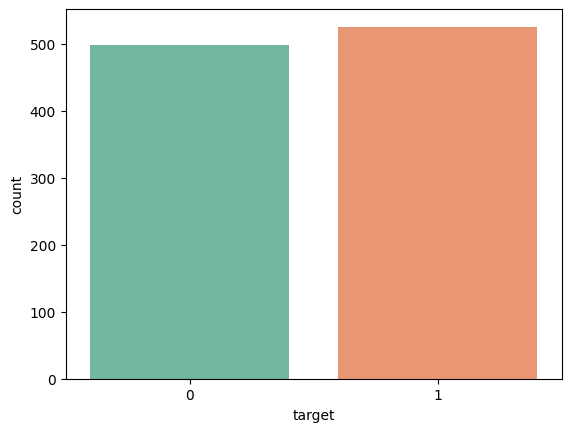

In [14]:

sns.countplot(x=dataset["target"],palette="Set2")


target_temp = dataset.target.value_counts()

print(target_temp)
plt.show()


In [15]:
print("Percentage of patience without heart problems: "+str(round(target_temp[0]*100/1025,2)))
print("Percentage of patience with heart problems: "+str(round(target_temp[1]*100/1025,2)))

Percentage of patience without heart problems: 48.68
Percentage of patience with heart problems: 51.32


## We'll analyse 'sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca' and 'thal' features

### Analysing the 'Sex' feature


In [16]:
dataset["sex"].unique()


array([1, 0], dtype=int64)

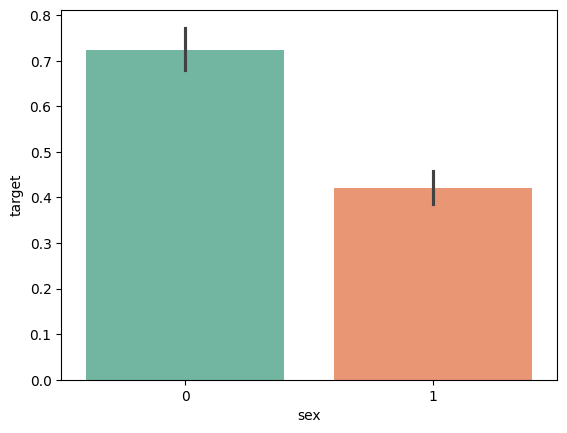

In [17]:
sns.barplot(x=dataset["sex"],y=dataset['target'],palette="Set2")
plt.show()

#### We notice, that females are more likely to have heart problems than males


## Analysing the 'Chest Pain Type' feature


In [18]:
dataset["cp"].unique()


array([0, 1, 2, 3], dtype=int64)

#### As expected, the CP feature has values from 0 to 3


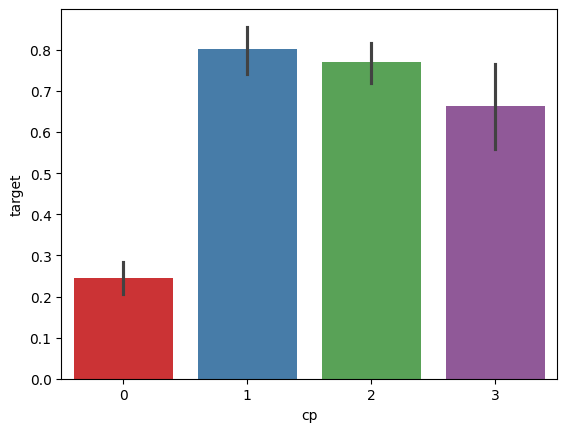

In [19]:
sns.barplot(x=dataset["cp"],y=dataset['target'],palette="Set1")

plt.show()

#### We notice, that chest pain of '0', i.e. the ones with typical angina are much less likely to have heart problems


## Analysing the FBS feature


In [20]:
dataset["fbs"].describe()


count    1025.000000
mean        0.149268
std         0.356527
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: fbs, dtype: float64

In [21]:
dataset["fbs"].unique()


array([0, 1], dtype=int64)

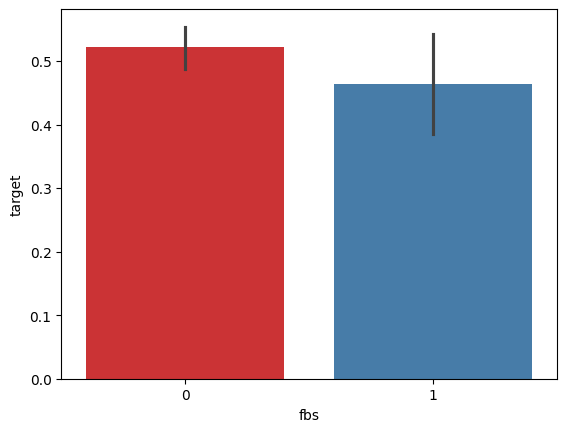

In [22]:
sns.barplot(x=dataset["fbs"],y=dataset['target'],palette="Set1")
plt.show()

##### Nothing extraordinary here


## Analysing the restecg feature


In [23]:
dataset["restecg"].unique()


array([1, 0, 2], dtype=int64)

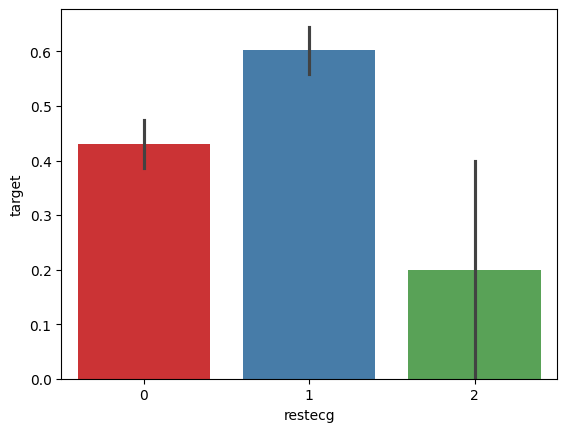

In [24]:
sns.barplot(x=dataset["restecg"],y=dataset['target'],palette="Set1")
plt.show()

#### We realize that people with restecg '1' and '0' are much more likely to have a heart disease than with restecg '2'


## Analysing the 'exang' feature


In [25]:
dataset["exang"].unique()


array([0, 1], dtype=int64)

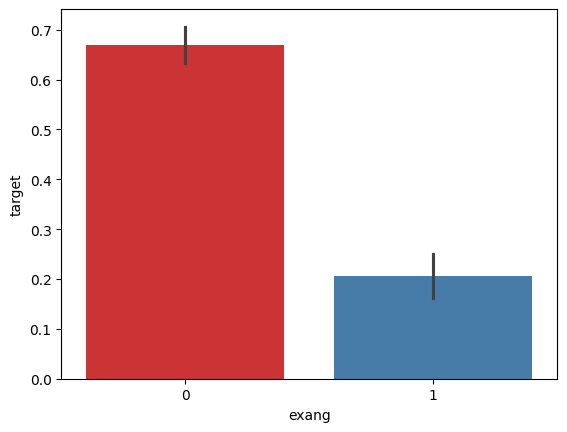

In [26]:
sns.barplot(x=dataset["exang"],y=dataset['target'],palette="Set1")
plt.show()

#### People with exang=1 i.e. Exercise induced angina are much less likely to have heart problems


## Analysing the Slope feature


In [27]:
dataset["slope"].unique()


array([2, 0, 1], dtype=int64)

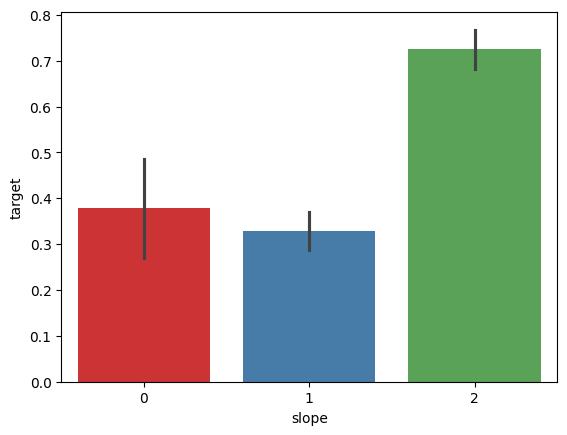

In [28]:
sns.barplot(x=dataset["slope"],y=dataset['target'],palette="Set1")
plt.show()

#### We observe, that Slope '2' causes heart pain much more than Slope '0' and '1'


## Analysing the 'ca' feature


In [29]:
#number of major vessels (0-3) colored by flourosopy


In [30]:
dataset["ca"].unique()


array([2, 0, 1, 3, 4], dtype=int64)

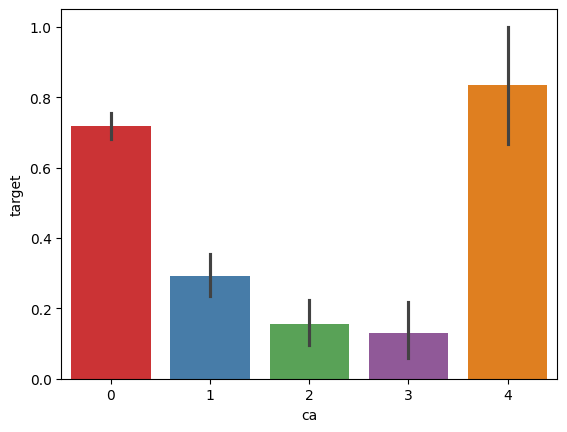

In [31]:
sns.barplot(x=dataset["ca"],y=dataset['target'],palette="Set1")
plt.show()

#### ca=4 has astonishingly large number of heart patients


## Analysing the 'thal' feature


In [32]:
dataset["thal"].unique()


array([3, 2, 1, 0], dtype=int64)

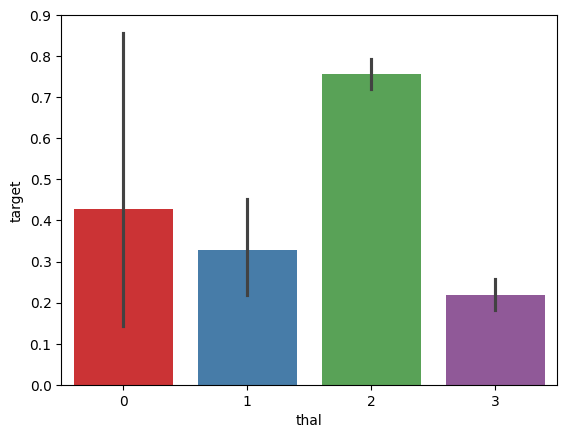

In [33]:
sns.barplot(x=dataset["thal"],y=dataset['target'],palette="Set1")
plt.show()

<Axes: xlabel='thal', ylabel='Density'>

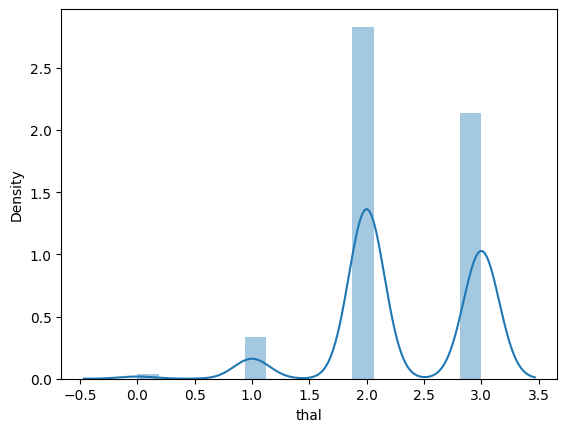

In [34]:
sns.distplot(dataset["thal"])


# Train Test split


In [35]:
from sklearn.model_selection import train_test_split

predictors = dataset.drop("target",axis=1)
target = dataset["target"]

X_train,X_test,Y_train,Y_test = train_test_split(predictors,target,test_size=0.20,random_state=0)


In [36]:
X_train.shape


(820, 13)

In [37]:
X_test.shape


(205, 13)

In [38]:
Y_train.shape

(820,)

In [39]:
Y_test.shape


(205,)

#  Model Fitting


In [40]:
from sklearn.metrics import accuracy_score


# 1. Logistic Regression


In [41]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

lr.fit(X_train,Y_train)

Y_pred_lr = lr.predict(X_test)

In [42]:
Y_pred_lr.shape


(205,)

In [43]:
score_lr = round(accuracy_score(Y_pred_lr,Y_test)*100,2)

print("The accuracy score achieved using Logistic Regression is: "+str(score_lr)+" %")


The accuracy score achieved using Logistic Regression is: 86.34 %


# 2. Naive Bayes
 

In [44]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()

nb.fit(X_train,Y_train)

Y_pred_nb = nb.predict(X_test)

In [45]:
Y_pred_nb.shape


(205,)

In [46]:
score_nb = round(accuracy_score(Y_pred_nb,Y_test)*100,2)

print("The accuracy score achieved using Naive Bayes is: "+str(score_nb)+" %")

The accuracy score achieved using Naive Bayes is: 85.37 %


# 3. SVM


In [47]:
from sklearn import svm

sv = svm.SVC(kernel='linear')

sv.fit(X_train, Y_train)

Y_pred_svm = sv.predict(X_test)

In [48]:
Y_pred_svm.shape


(205,)

In [49]:
score_svm = round(accuracy_score(Y_pred_svm,Y_test)*100,2)

print("The accuracy score achieved using Linear SVM is: "+str(score_svm)+" %")

The accuracy score achieved using Linear SVM is: 83.9 %


# 4. K Nearest Neighbors


In [50]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train,Y_train)
Y_pred_knn=knn.predict(X_test)

In [51]:
Y_pred_knn.shape


(205,)

In [52]:
score_knn = round(accuracy_score(Y_pred_knn,Y_test)*100,2)

print("The accuracy score achieved using KNN is: "+str(score_knn)+" %")

The accuracy score achieved using KNN is: 72.2 %


# 5. Decision Tree


In [53]:
from sklearn.tree import DecisionTreeClassifier

max_accuracy = 0


for x in range(200):
    dt = DecisionTreeClassifier(random_state=x)
    dt.fit(X_train,Y_train)
    Y_pred_dt = dt.predict(X_test)
    current_accuracy = round(accuracy_score(Y_pred_dt,Y_test)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x
        
#print(max_accuracy)
#print(best_x)


dt = DecisionTreeClassifier(random_state=best_x)
dt.fit(X_train,Y_train)
Y_pred_dt = dt.predict(X_test)

In [54]:
print(Y_pred_dt.shape)


(205,)


In [55]:
score_dt = round(accuracy_score(Y_pred_dt,Y_test)*100,2)

print("The accuracy score achieved using Decision Tree is: "+str(score_dt)+" %")

The accuracy score achieved using Decision Tree is: 100.0 %


# 6. Random Forest


In [56]:
from sklearn.ensemble import RandomForestClassifier

max_accuracy = 0


for x in range(2000):
    rf = RandomForestClassifier(random_state=x)
    rf.fit(X_train,Y_train)
    Y_pred_rf = rf.predict(X_test)
    current_accuracy = round(accuracy_score(Y_pred_rf,Y_test)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x
        
print(max_accuracy)
print(best_x)

rf = RandomForestClassifier(random_state=best_x)
rf.fit(X_train,Y_train)
Y_pred_rf = rf.predict(X_test)

100.0
0


In [57]:
Y_pred_rf.shape


(205,)

In [58]:
score_rf = round(accuracy_score(Y_pred_rf,Y_test)*100,2)

print("The accuracy score achieved using Decision Tree is: "+str(score_rf)+" %")

The accuracy score achieved using Decision Tree is: 100.0 %


# Output final score


In [59]:
scores = [score_lr,score_nb,score_svm,score_knn,score_dt]
algorithms = ["Logistic Regression","Naive Bayes","Support Vector Machine","K-Nearest Neighbors","Decision Tree"]    

for i in range(len(algorithms)):
    print("The accuracy score achieved using "+algorithms[i]+" is: "+str(scores[i])+" %")


The accuracy score achieved using Logistic Regression is: 86.34 %
The accuracy score achieved using Naive Bayes is: 85.37 %
The accuracy score achieved using Support Vector Machine is: 83.9 %
The accuracy score achieved using K-Nearest Neighbors is: 72.2 %
The accuracy score achieved using Decision Tree is: 100.0 %


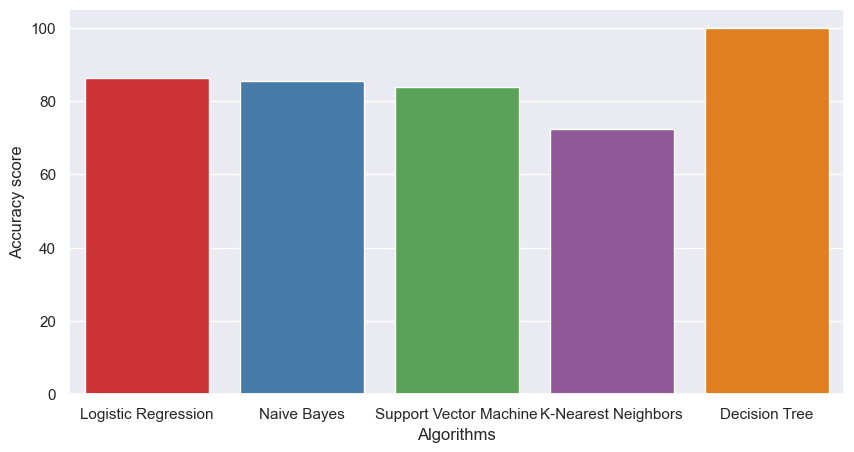

In [60]:
sns.set(rc={'figure.figsize':(10,5)})
plt.xlabel("Algorithms")
plt.ylabel("Accuracy score")

sns.barplot(x=algorithms,y=scores,palette="Set1")
plt.show()

# Decision tree has good result as compare to other algorithms


In [63]:
plotCorrelationMatrix(df1, 8)

NameError: name 'plotCorrelationMatrix' is not defined